# Convolutional Neural Network (CNN) para clasificación de imágenes

### Paso 1: Importación de las librerías necesarias y dataset

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib inline

tf.__version__

'2.18.0'

### Paso 2: preprocesado de los datos

In [ ]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']


# Cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


### Paso 3: Normalización las imágenes

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Construcción de la CNN

In [ ]:
model = tf.keras.models.Sequential()

# Donde la primera capa sería:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))


# Segunda capa convolucional y capa de max-pooling (suelen ir una a continuación de la otra, convolucional y max-pooling)
# La convolucional:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


# Añade una tercera capa convolucional sin max-pooling y una cuarta convolucional con otra capa de max-pooling seguida:
# Es normal algo como 2 conv y 1 max_pooling: convolucional (con 64 filtros) -> convolucional (64 filtros) -> max_pooling
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


# Añade la capa de flattering (aplanado final en un vector)
model.add(tf.keras.layers.Flatten())


# Añade la primera capa fully-connected
model.add(tf.keras.layers.Dense(units=128, activation='relu'))


# Añade la capa de salida
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


model.summary()

c:\Users\soyun\anaconda3\envs\aprendizaje\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### Paso 5: entrenamiento y evaluación del modelo

Más info de metrics en https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [8]:
# Compila el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])


# Entrena el modelo (hazlo así, o dividiendo previamente train en train y val)
model.fit(X_train, y_train, epochs=5)


# Evalúa el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test accuracy: {}".format(test_accuracy))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6720 - sparse_categorical_accuracy: 0.3810
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.9781 - sparse_categorical_accuracy: 0.6537
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.7640 - sparse_categorical_accuracy: 0.7325
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.6340 - sparse_categorical_accuracy: 0.7748
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.5292 - sparse_categorical_accuracy: 0.8150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8021 - sparse_categorical_accuracy: 0.7341
Test accuracy: 0.7342000007629395


### Paso 6: mejora del modelo:

Reconstruimos el modelo añadiendo capas de dropout después de cada max-pooling para evitar el overfitting y batch normalization para estabilizar el entrenamiento.

In [16]:
model2 = tf.keras.models.Sequential()

# Primera capa convolucional con un filtro 
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding="same", input_shape=[32, 32, 3]))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))

# Segunda capa convolucional con Batch Normalization
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same"))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Dropout(0.5))

# Tercera y cuarta capa convolucional con Batch Normalization
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same"))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))

model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same"))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Dropout(0.5))

# Aplanado y capas densas con Batch Normalization antes de la última capa de activación
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=128))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.Dropout(0.5))

# Capa de salida
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model2.summary()


c:\Users\soyun\anaconda3\envs\aprendizaje\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,294,282 (4.94 MB)

 Trainable params: 1,293,322 (4.93 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

history2 = model2.fit(X_train, y_train, epochs=40)

test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)

print("Test test_loss: {}".format(test_loss2))
print("Test accuracy: {}".format(test_accuracy2))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - loss: 0.6873 - sparse_categorical_accuracy: 0.7658
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - loss: 0.6362 - sparse_categorical_accuracy: 0.7819
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - loss: 0.6126 - sparse_categorical_accuracy: 0.7869
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - loss: 0.5863 - sparse_categorical_accuracy: 0.7993
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - loss: 0.5638 - sparse_categorical_accuracy: 0.8054
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - loss: 0.5464 - sparse_categorical_accuracy: 0.8143
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - loss: 0.5372 - sparse_categorical_accuracy: 0.8102
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - loss: 0.5122 - sparse_categorical_accuracy: 0.8223
Epoch 9/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - loss: 0.4953 - sparse_categorical_accuracy: 0.8289
Epoch 10/40
15

### Paso 7: Visualización de los resultados

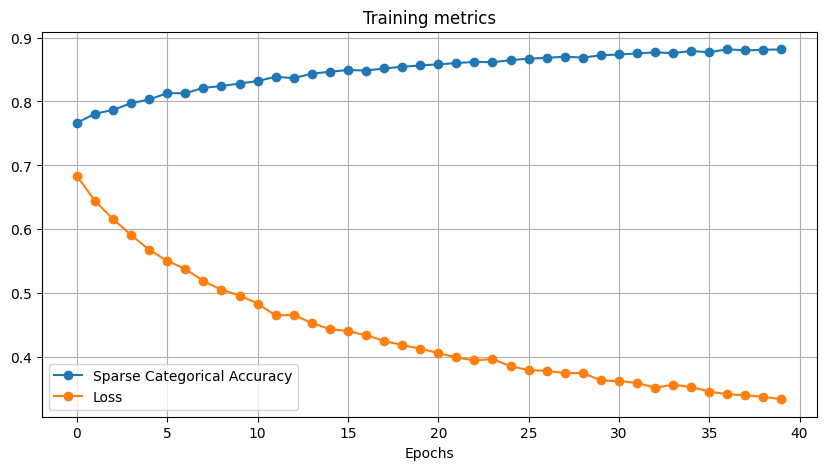

In [31]:
acc = history2.history['sparse_categorical_accuracy']
loss = history2.history['loss']

plt.figure(figsize=(10, 5))
plt.plot(acc, label='Sparse Categorical Accuracy', marker='o')
plt.plot(loss, label='Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training metrics')
plt.legend()
plt.grid(True)
plt.show()